In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Carregar o dataset
df_salario = pd.read_csv('./datasets/dataset_salario.csv')

In [3]:
# Inspecionar a estrutura do dataframe
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [4]:
# Copiar o DF para DF EDA
df_salario_eda = df_salario.copy()

In [5]:
# Copiar o DF para DF Bucketing
df_salario_bucketing = df_salario.copy()

### EDA

In [6]:
#  Visualizar os dados
df_salario_eda.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
5,105,10,12102.18
6,80,3,5723.35
7,85,2,6424.92
8,66,5,3916.18
9,73,5,4751.79


In [7]:
# Detectar valores ausentes
df_salario_eda.isna().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

In [8]:
# Extrair medidas estatísticas
df_salario_eda.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


<Axes: xlabel='tempo_na_empresa'>

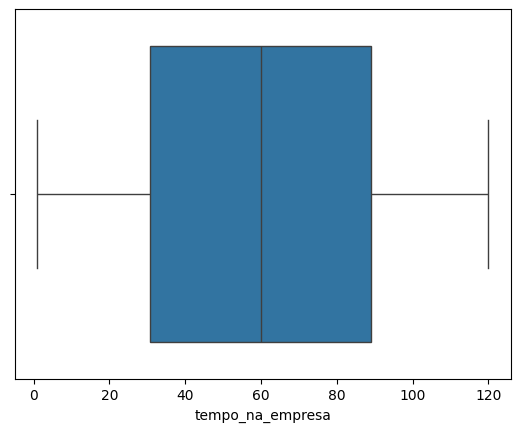

In [9]:
# Verificar / detectar outliers
sns.boxplot(data=df_salario_eda, x= 'tempo_na_empresa')

<Axes: xlabel='nivel_na_empresa'>

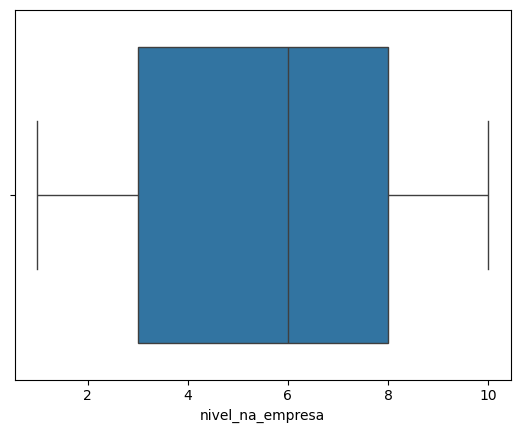

In [10]:
sns.boxplot(data=df_salario_eda, x= 'nivel_na_empresa')

<Axes: xlabel='salario_em_reais'>

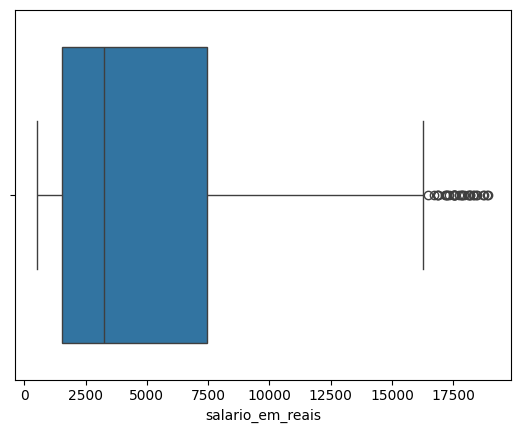

In [11]:
sns.boxplot(data=df_salario_eda, x= 'salario_em_reais')

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

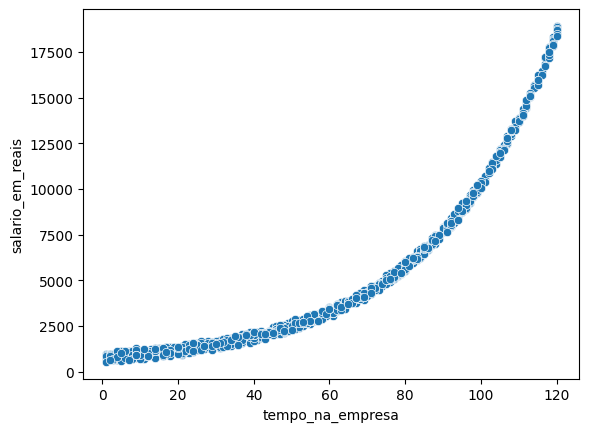

In [12]:
# Cruzamento variáveis numéricas com salário em reais (variável dependente)
sns.scatterplot(data=df_salario_eda, x= 'tempo_na_empresa', y= 'salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

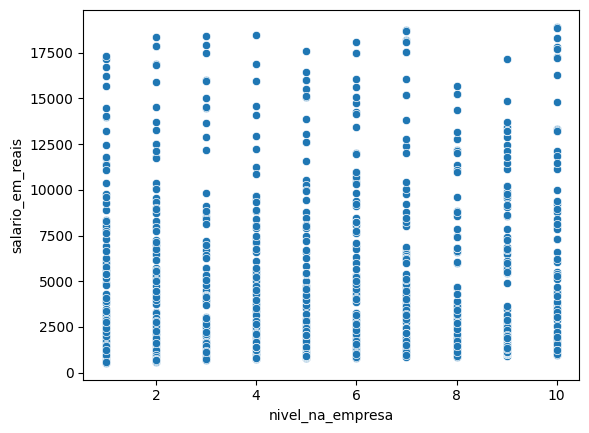

In [13]:
sns.scatterplot(data=df_salario_eda, x= 'nivel_na_empresa', y= 'salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='tempo_na_empresa'>

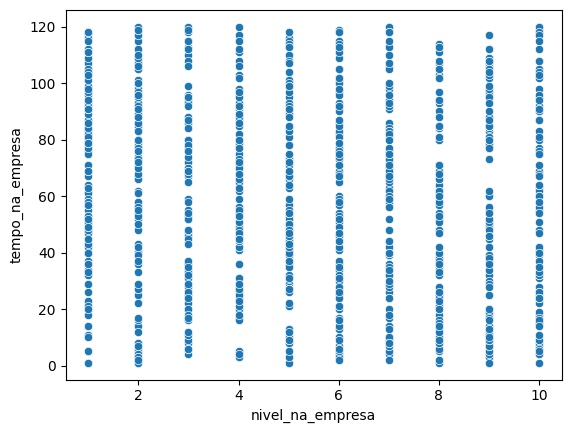

In [14]:
sns.scatterplot(data=df_salario_eda, x= 'nivel_na_empresa', y= 'tempo_na_empresa')

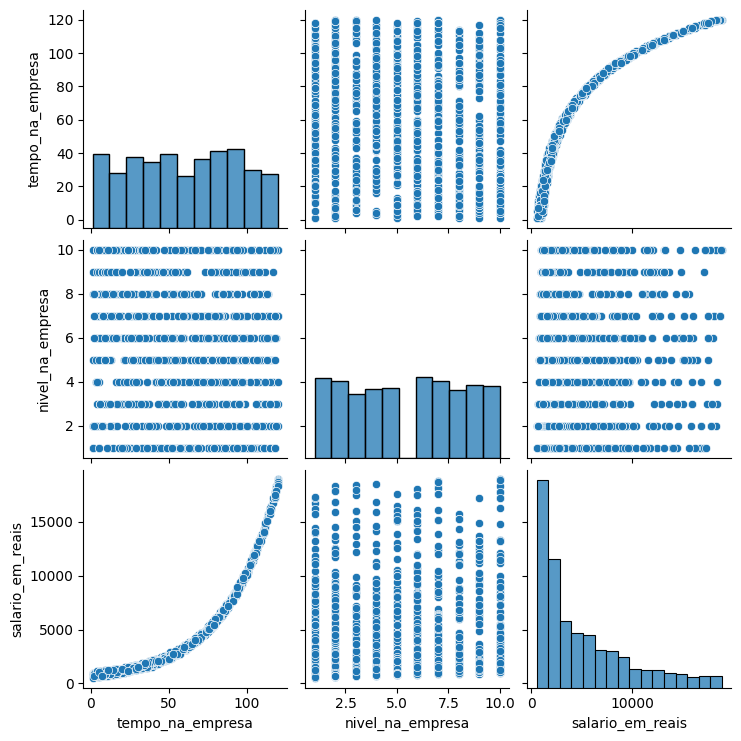

In [15]:
# Histogramas das varíaveis
sns.pairplot(df_salario_eda)

<Axes: >

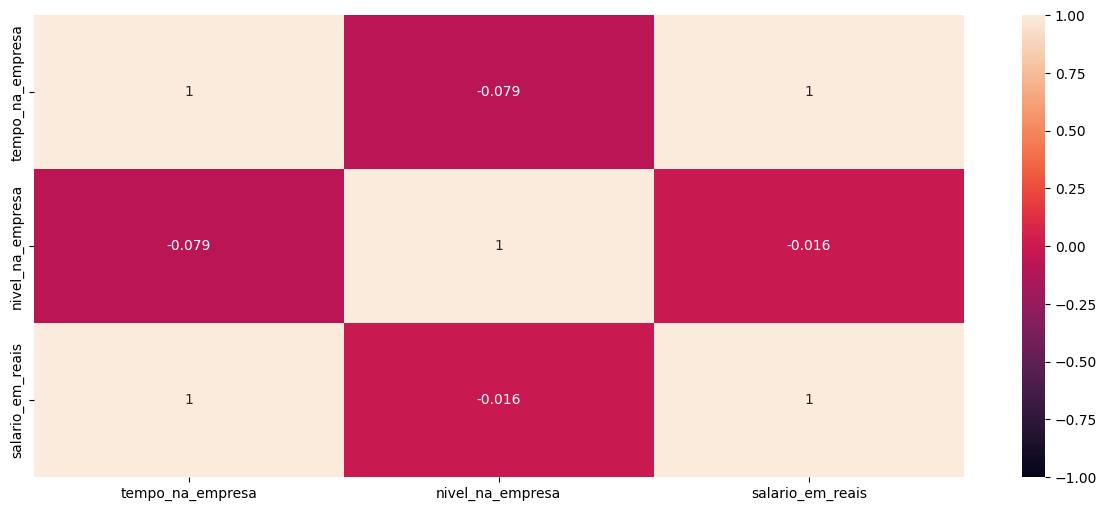

In [16]:
# Mapa de calor
plt.figure(figsize=(15,6))
sns.heatmap(df_salario_eda.corr('spearman'), vmin= -1, vmax= 1, annot= True)

<Axes: >

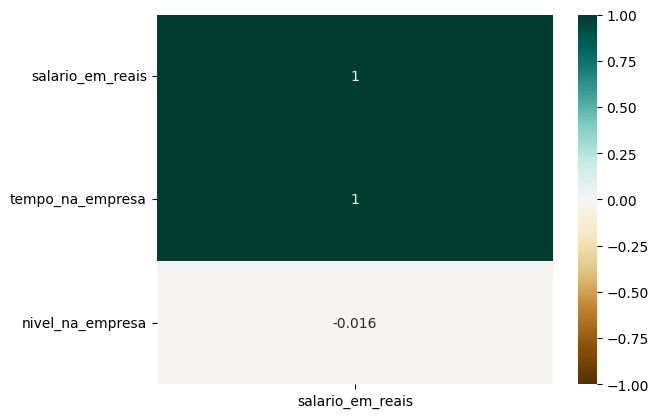

In [17]:
# Formato de ranking
sns.heatmap(df_salario_eda.corr('spearman')[['salario_em_reais']].sort_values(by='salario_em_reais', ascending= False), vmin= -1, vmax= 1, annot= True, cmap='BrBG')

In [18]:
# Bucketing tempo de casa
bins_tempo_casa = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
labels_tempo_casa = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129']
df_salario_bucketing['escala_tempo'] = pd.cut(x=df_salario_bucketing['tempo_na_empresa'], bins= bins_tempo_casa, labels= labels_tempo_casa, include_lowest= True)

In [19]:
df_salario_bucketing.head(20)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,escala_tempo
0,50,1,2288.13,40-49
1,49,4,2389.84,40-49
2,39,10,2158.73,30-39
3,51,1,2341.06,50-59
4,62,7,3584.20,60-69
5,105,10,12102.18,100-109
6,80,3,5723.35,70-79
7,85,2,6424.92,80-89
8,66,5,3916.18,60-69
9,73,5,4751.79,70-79


<Axes: xlabel='escala_tempo', ylabel='salario_em_reais'>

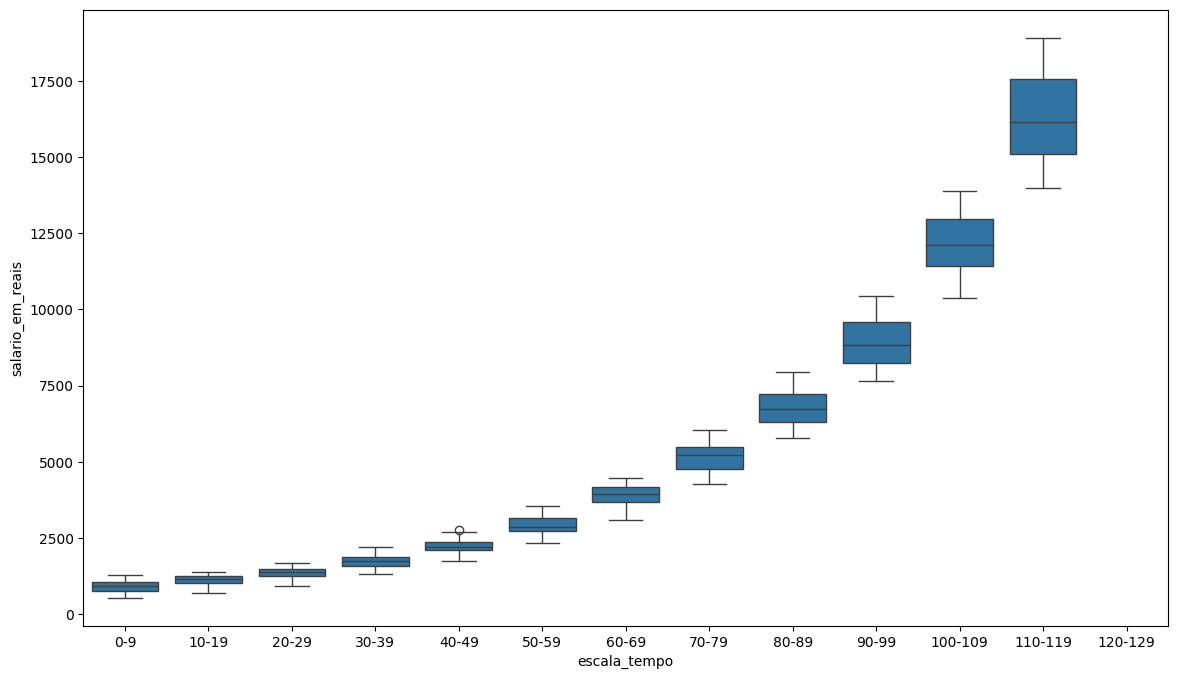

In [20]:
plt.figure(figsize=(14,8))
sns.boxplot(df_salario_bucketing, x='escala_tempo', y= 'salario_em_reais')

### Treinamento do modelo linear

In [21]:
# Import bibliotecas
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

import numpy as np


In [22]:
# Criar o Dataset de treino e teste
X = df_salario.drop(columns='salario_em_reais', axis= 1)
y = df_salario['salario_em_reais']

In [23]:
# Split usando KFold com 5 pastas/splits
kf = KFold(n_splits= 5, shuffle= True, random_state= 51)

In [24]:
# Bloco para treinamento do modelo

# Pipeline
# Padronizar variáveis numéricas - tempo_na_empresa, nivel_na_empresa

# Nome das colunas
colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

# Transformer para colunas numéricas
transformer_numericas = Pipeline(steps= [
    ('scaler', StandardScaler())
])

# Criar um ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numericas)
    ]
)

# Criar o pipeline principal = pré-processamento + treinamento
model_regr = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', LinearRegression())
                            ])

# Armazenar RMSE treino e teste
rmse_scores_fold_train = []
rmse_scores_fold_test = []

# Armazenar R2 Score de teste
r2score_fold_test = []

# Armazenar resíduos
residuos = []

# Armazenar predições
y_pred_total = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar modelo no conjunto de treinamento
    model_regr.fit(X_train, y_train)

    # Fazer predições nos conjuntos de treinamento e teste
    y_train_pred = model_regr.predict(X_train)
    y_test_pred = model_regr.predict(X_test)

    # Calcular métricas para o conjunto de treinamento e teste
    rmse_train = mean_squared_error(y_train, y_train_pred, squared= False)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared= False)
    r2score_test = r2_score(y_test, y_test_pred)
    residuos_test = np.array(y_test - y_test_pred)

    # Armazenamento as métricas da iteração da lista
    rmse_scores_fold_train.append(rmse_train)
    rmse_scores_fold_test.append(rmse_test)
    r2score_fold_test.append(r2score_test)
    residuos.append(residuos_test)
    y_pred_total.append(y_test_pred)

rmse_train_final = np.mean(rmse_scores_fold_train)
rmse_test_final = np.mean(rmse_scores_fold_test)
r2score_test_final = np.mean(r2score_fold_test)
percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100
residuos = np.array(residuos).reshape(-1)
y_pred_total = np.array(y_pred_total).reshape(-1)

### Análise de métricas do modelo linear

In [25]:
# Métricas
print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Test: {rmse_test_final}')
print(f'% Diferença RMSE treino e teste: {percentual_rmse_final}')
print(f'R2Score Test: {r2score_test_final}')

RMSE Treino: 1882.8318426651392
RMSE Test: 1886.4504221336076
% Diferença RMSE treino e teste: 0.19218813844503052
R2Score Test: 0.8261178870584761


### Análise de resíduos - modelo linear

In [26]:
# Transformar resíduos na escala padrão

from scipy.stats import zscore
residuos_std = zscore(residuos)

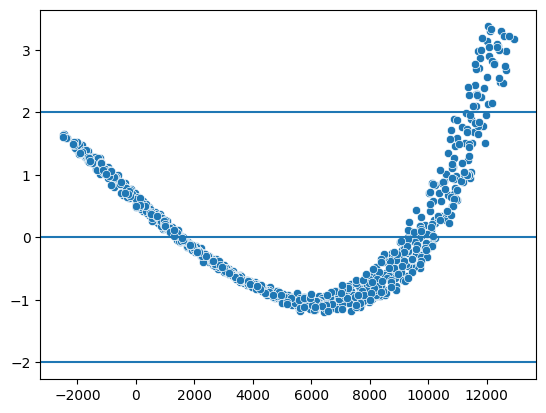

In [27]:
# Verificar linearidade dos resíduos: valores entre -2 e +2 (escala padrão)
# Verificar homecadasticidade: valores em torno da reta sem nenhuma tendência ou formato
sns.scatterplot(x= y_pred_total, y= residuos_std)
plt.axhline(y= 0)
plt.axhline(y= -2)
plt.axhline(y= 2)

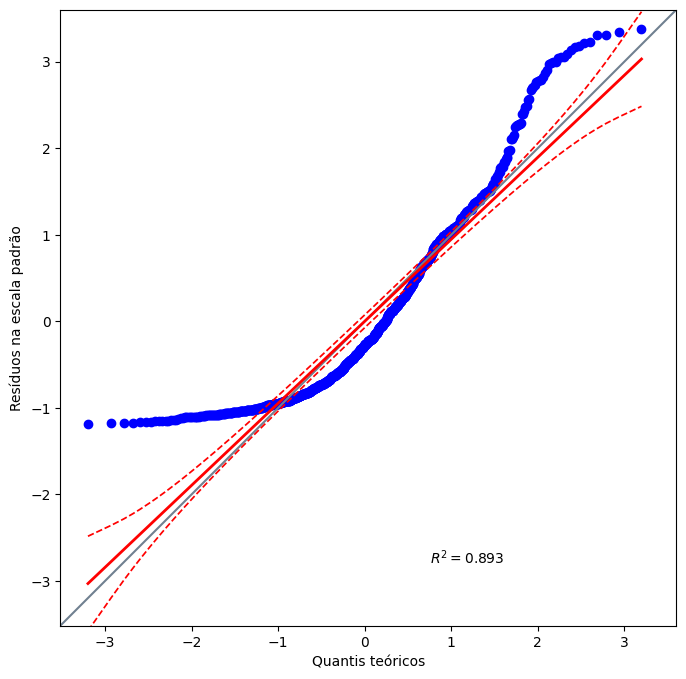

In [28]:
# Checar se resíduos seguem uma distribuição normal
# QQ Plot
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist= 'norm', confidence=0.95)
plt.xlabel('Quantis teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [29]:
# Imports testes de normalidade
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors

In [30]:
# Teste de normalidade = Shapiro-Wilk
stats_shapiro, p_value_shapiro = shapiro(residuos)
print(f"Shapiro- Estatísticas teste: {stats_shapiro} e p-value: {p_value_shapiro}")

Shapiro- Estatísticas teste: 0.891970157623291 e p-value: 7.015059614730555e-26


In [31]:
# Teste de normalidade = Kolmogorov-Smirnov
stats_ks, p_value_ks = kstest(residuos, 'norm')
print(f"Kolmogorov- Estatísticas teste {stats_ks} e p-value: {p_value_ks}")

Kolmogorov- Estatísticas teste 0.5939999999999955 e p-value: 0.0


In [32]:
# Teste de normalidade = Lilliefors
stats_ll, p_value_ll = lilliefors(residuos, 'norm', pvalmethod='table')
print(f"Lilliefors- Estatísticas teste {stats_ll} e p-value: {p_value_ll}")

Lilliefors- Estatísticas teste 0.11825983774680088 e p-value: 0.0009999999999998899


### Treinamento modelo polinomial

In [33]:
# Bloco para treinamento do modelo

# Valores utilizados para definição do grau polinomial
# graus_polynomial = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Valor do polinômio ser utilizado
graus_polynomial = [4]

rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2_score_test_values = []

# Split usando KFold com 5 pastas/splits
kf = KFold(n_splits= 5, shuffle= True, random_state= 51)

for grau in graus_polynomial:

    # Pipeline
    # Padronizar variáveis numéricas - tempo_na_empresa, nivel_na_empresa

    # Nome das colunas
    colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

    # Transformer para colunas numéricas
    transformer_numericas = Pipeline(steps= [
        ('scaler', StandardScaler())
    ])

    # Criar um ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', transformer_numericas, colunas_numericas)
        ]
    )

    # Criar features polinomiais
    poly_feat = PolynomialFeatures(degree= grau, include_bias= False)

    # Criar o pipeline principal = pré-processamento + treinamento
    model_poly = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('poly_features', poly_feat),
                                 ('regressor', LinearRegression())
                                ])

    # Armazenar RMSE treino e teste
    rmse_scores_fold_train = []
    rmse_scores_fold_test = []

    # Armazenar R2 Score de teste
    r2score_fold_test = []

    # Armazenar resíduos
    residuos = []

    # Armazenar predições
    y_pred_total = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Treinar modelo no conjunto de treinamento
        model_poly.fit(X_train, y_train)

        # Fazer predições nos conjuntos de treinamento e teste
        y_train_pred = model_poly.predict(X_train)
        y_test_pred = model_poly.predict(X_test)

        # Calcular métricas para o conjunto de treinamento e teste
        rmse_train = mean_squared_error(y_train, y_train_pred, squared= False)
        rmse_test = mean_squared_error(y_test, y_test_pred, squared= False)
        r2score_test = r2_score(y_test, y_test_pred)
        residuos_test = np.array(y_test - y_test_pred)

        # Armazenamento as métricas da iteração da lista
        rmse_scores_fold_train.append(rmse_train)
        rmse_scores_fold_test.append(rmse_test)
        r2score_fold_test.append(r2score_test)
        residuos.append(residuos_test)
        y_pred_total.append(y_test_pred)

    rmse_train_final = np.mean(rmse_scores_fold_train)
    rmse_test_final = np.mean(rmse_scores_fold_test)
    r2score_test_final = np.mean(r2score_fold_test)
    percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100
    residuos = np.array(residuos).reshape(-1)
    y_pred_total = np.array(y_pred_total).reshape(-1)

    rmse_train_values.append(rmse_train_final)
    rmse_test_values.append(rmse_test_final)
    r2_score_test_values.append(r2score_test_final)
    percentual_rmse_values.append(percentual_rmse_final)

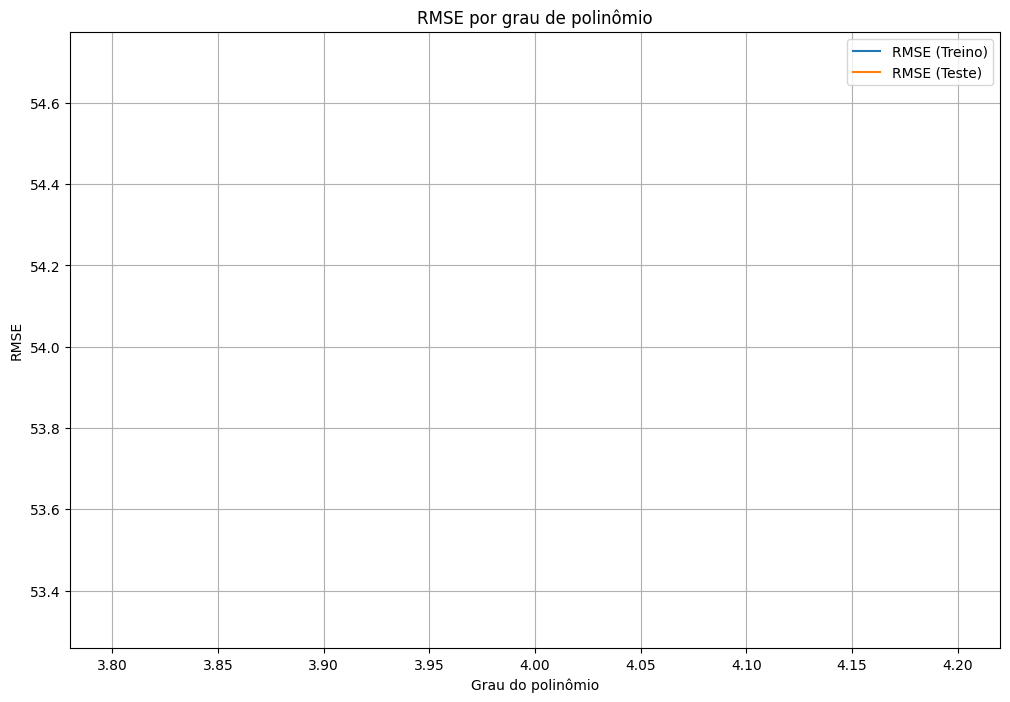

In [34]:
# Plotar gráfico de comparação de RMSE por grau de polinômio
plt.figure(figsize=(12,8))
plt.plot(graus_polynomial, rmse_train_values, label='RMSE (Treino)')
plt.plot(graus_polynomial, rmse_test_values, label='RMSE (Teste)')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por grau de polinômio')
plt.legend()
plt.grid(True)
plt.show()

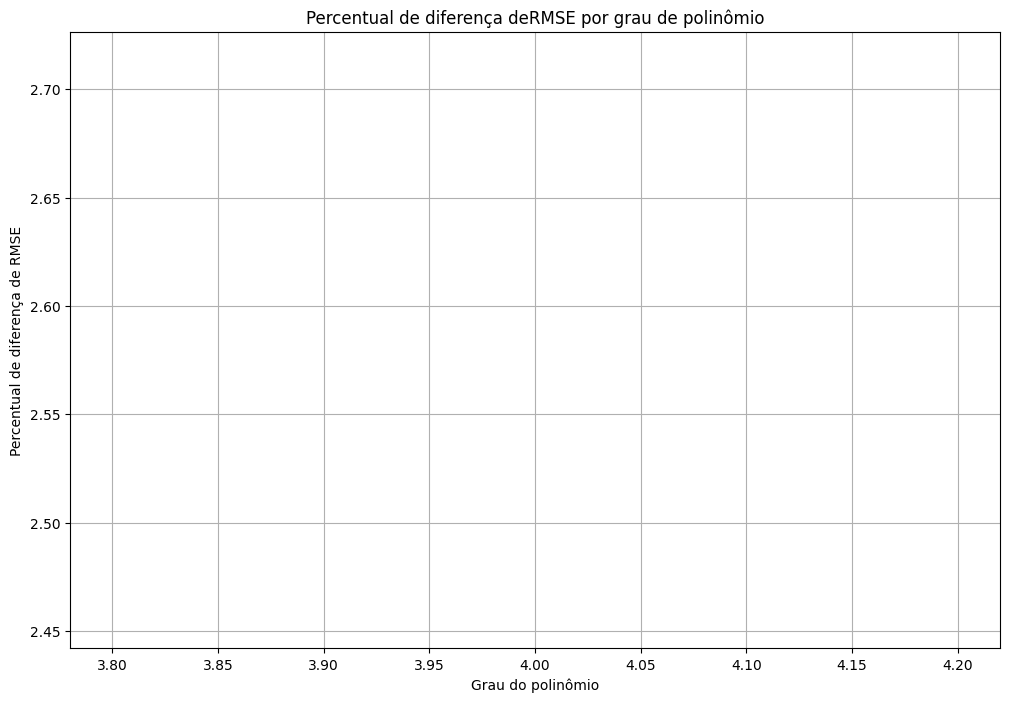

In [35]:
# Plotar gráfico de comparação percentual de diferença de RMSE (treino e teste)
plt.figure(figsize=(12,8))
plt.plot(graus_polynomial, percentual_rmse_values, label='Percentual de diferença de RMSE (treino e teste)')
plt.xlabel('Grau do polinômio')
plt.ylabel('Percentual de diferença de RMSE')
plt.title('Percentual de diferença deRMSE por grau de polinômio')
plt.grid(True)
plt.show()

### Análise de métricas modelo polinomial

In [36]:
# Métricas
print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Test: {rmse_test_final}')
print(f'% Diferença RMSE treino e teste: {percentual_rmse_final}')
print(f'R2Score Test: {r2score_test_final}')

RMSE Treino: 53.32698559565159
RMSE Test: 54.70504352796338
% Diferença RMSE treino e teste: 2.584166190755325
R2Score Test: 0.9998524123039415


### Análise de resíduos modelo polinomial

In [37]:
# Transformar resíduos na escala padrão
residuos_std = zscore(residuos)

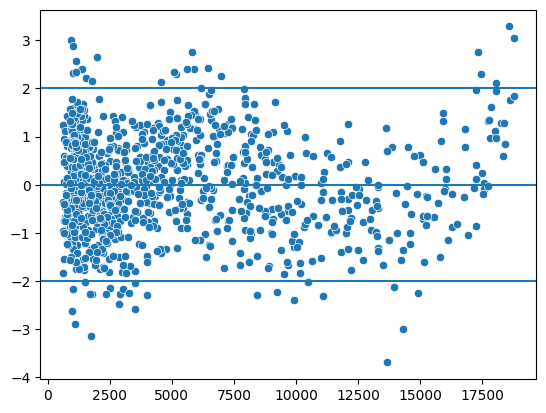

In [38]:
# Verificar linearidade dos resíduos: valores entre -2 e +2 (escala padrão)
# Verificar homecadasticidade: valores em torno da reta sem nenhuma tendência ou formato
sns.scatterplot(x= y_pred_total, y= residuos_std)
plt.axhline(y= 0)
plt.axhline(y= -2)
plt.axhline(y= 2)

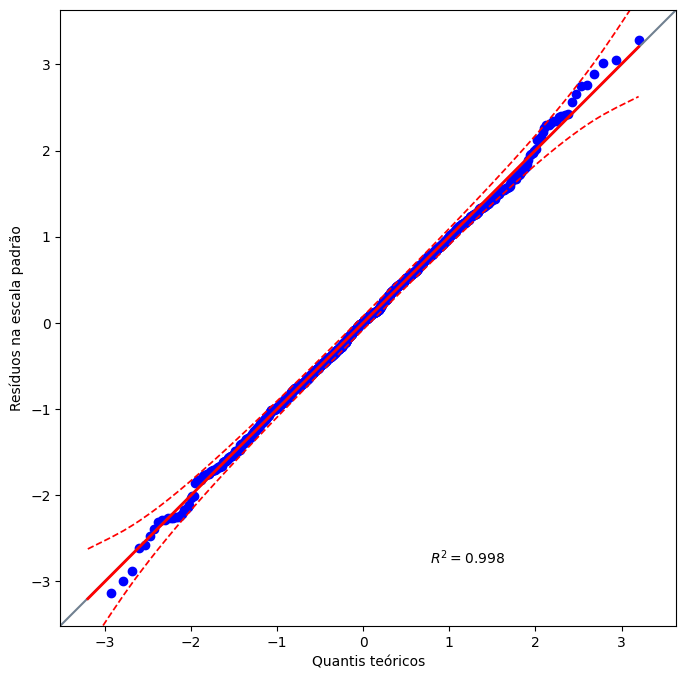

In [39]:
# Checar se resíduos seguem uma distribuição normal
# QQ Plot
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist= 'norm', confidence=0.95)
plt.xlabel('Quantis teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [40]:
# Teste de normalidade = Shapiro-Wilk
stats_shapiro, p_value_shapiro = shapiro(residuos)
print(f"Shapiro- Estatísticas teste: {stats_shapiro} e p-value: {p_value_shapiro}")

Shapiro- Estatísticas teste: 0.9986947774887085 e p-value: 0.6850231289863586


In [41]:
# Teste de normalidade = Kolmogorov-Smirnov
stats_ks, p_value_ks = kstest(residuos, 'norm')
print(f"Kolmogorov- Estatísticas teste {stats_ks} e p-value: {p_value_ks}")

Kolmogorov- Estatísticas teste 0.4823744649953392 e p-value: 1.2202460105710526e-214


In [42]:
# Teste de normalidade = Lilliefors
stats_ll, p_value_ll = lilliefors(residuos, 'norm', pvalmethod='table')
print(f"Lilliefors- Estatísticas teste {stats_ll} e p-value: {p_value_ll}")

Lilliefors- Estatísticas teste 0.013637346894973312 e p-value: 0.956627002204744


### Realizar predições individuais

In [49]:
input_feature = {
    'tempo_na_empresa': 80,
    'nivel_na_empresa': 6
}

predicao_df = pd.DataFrame(input_feature, index=[1])

In [50]:
# Predição
model_poly.predict(predicao_df)

array([5794.2483989])

In [51]:
# Salvar o modelo 
import joblib
joblib.dump(model_poly, './modelo_salario.pkl')

['./modelo_salario.pkl']